## Importing libraries

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Design Credits/DESIGN_CREDIT_DATASET2.txt",delim_whitespace=" ")
dataset

,VECTOR,Total-Gates,Test-Power
0,0101011111111111111111111111111111111111111111...,447.0,21.0
1,1101010111111111111111111111111111111111111111...,439.0,23.0
2,1111010101111111111111111111111111111111111111...,426.0,23.0
3,1111110101011111111111111111111111111111111111...,534.0,22.0
4,1111111101010111111111111111111111111111111111...,458.0,23.0
...,...,...,...
221,1111111101010101010101010101010101010101011111...,454.0,114.0
222,1111111111010101010101010101010101010101010111...,452.0,116.0
223,1111111111110101010101010101010101010101010101...,513.0,115.0
224,1111111111111101010101010101010101010101010101...,450.0,116.0


In [ ]:
# dropping last row
dataset = dataset.loc[dataset['VECTOR']!='225']

In [ ]:
dataset

,VECTOR,Total-Gates,Test-Power
0,0101011111111111111111111111111111111111111111...,447.0,21.0
1,1101010111111111111111111111111111111111111111...,439.0,23.0
2,1111010101111111111111111111111111111111111111...,426.0,23.0
3,1111110101011111111111111111111111111111111111...,534.0,22.0
4,1111111101010111111111111111111111111111111111...,458.0,23.0
...,...,...,...
220,1111110101010101010101010101010101010101111111...,451.0,114.0
221,1111111101010101010101010101010101010101011111...,454.0,114.0
222,1111111111010101010101010101010101010101010111...,452.0,116.0
223,1111111111110101010101010101010101010101010101...,513.0,115.0


In [ ]:
switches = []
for i in range(len(dataset)):
  count=0
  for j in range(len(dataset["VECTOR"][i])-1):
    if (dataset["VECTOR"][i][j] == '1' and dataset["VECTOR"][i][j+1] == '0'):
      count = count+1
    if (dataset["VECTOR"][i][j] == '0' and dataset["VECTOR"][i][j+1] == '1'):
      count = count+1
  switches.append(count)

In [ ]:
# dataset['switches'] = switches
idx = 1
dataset.insert(loc=idx, column='Switch', value=switches)
dataset

,VECTOR,Switch,Total-Gates,Test-Power
0,0101011111111111111111111111111111111111111111...,5,447.0,21.0
1,1101010111111111111111111111111111111111111111...,6,439.0,23.0
2,1111010101111111111111111111111111111111111111...,6,426.0,23.0
3,1111110101011111111111111111111111111111111111...,6,534.0,22.0
4,1111111101010111111111111111111111111111111111...,6,458.0,23.0
...,...,...,...,...
220,1111110101010101010101010101010101010101111111...,34,451.0,114.0
221,1111111101010101010101010101010101010101011111...,34,454.0,114.0
222,1111111111010101010101010101010101010101010111...,34,452.0,116.0
223,1111111111110101010101010101010101010101010101...,34,513.0,115.0


In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

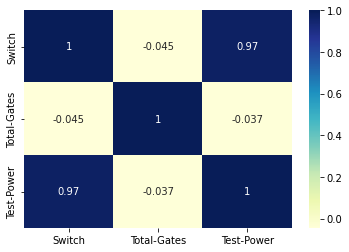

In [ ]:
dataset1 = dataset.drop(labels = ["VECTOR"],axis=1)
sb.heatmap(dataset1.corr(), cmap="YlGnBu", annot=True)

In [ ]:
MSE_list = dict()

Ridge regression

In [ ]:
reg_ridge = Ridge(alpha = 1)
reg_ridge.fit(x_train,y_train)
y_pred_ridge = reg_ridge.predict(x_test)
MSE_list["ridge regression"] = MSE(y_pred_ridge,y_test)

In [ ]:
print(MSE(y_pred_ridge,y_test))

35.527891743811495


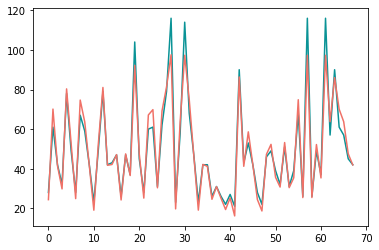

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_ridge,color="#f07167")
plt.show()

Nearest neighbour regression

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train,y_train)
y_pred_knn1 = knn_reg.predict(x_test)
MSE_list["KNN"] = MSE(y_pred_knn1,y_test)

In [ ]:
print(MSE(y_pred_knn1,y_test))

44.24764705882354


In [ ]:
MSE_KNN = list()
for i in range(5,15):
  knn_reg = KNeighborsRegressor(n_neighbors=i)
  knn_reg.fit(x_train,y_train)
  y_pred_knn = knn_reg.predict(x_test)
  MSE_KNN.append(MSE(y_pred_knn,y_test))

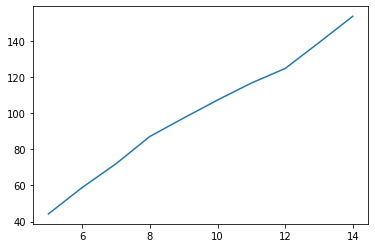

In [ ]:
plt.plot(range(5,15),MSE_KNN)
plt.show()

In [ ]:
# INCREASING N_NEIGHBOURS increases MSE

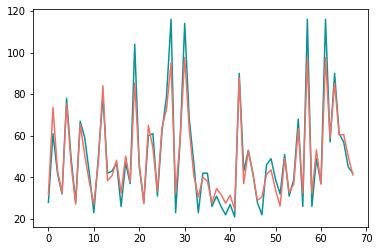

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_knn1,color="#f07167")
plt.show()

Decision tree regression

In [ ]:
reg_dt = DecisionTreeRegressor(random_state=1)
reg_dt.fit(x_train,y_train)
y_pred_dt = reg_dt.predict(x_test)

In [ ]:
print(MSE(y_pred_dt,y_test))

1.7205882352941178


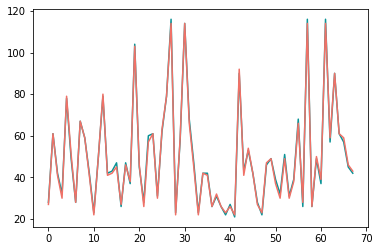

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_dt,color="#f07167")
plt.show()

In [ ]:
MSE_dt = list()
for i in range(3,10):
  reg_dt = DecisionTreeRegressor(random_state=1,max_depth=i)
  reg_dt.fit(x_train,y_train)
  y_pred_dt = reg_dt.predict(x_test)
  MSE_dt.append(MSE(y_pred_dt,y_test))

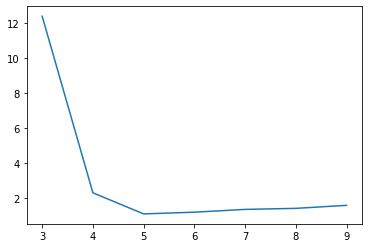

In [ ]:
plt.plot(range(3,10),MSE_dt)
plt.show()

In [ ]:
# INCREASING DEPTH INCREASES MSE 
# GOOD TO HAVE LOWER DEPTH

In [ ]:
minimum = min(MSE_dt)

In [ ]:
MSE_list["decision tree"] = minimum

Random forest regression

In [ ]:
rf_reg = RandomForestRegressor(max_depth = 5,random_state=0)
rf_reg = rf_reg.fit(x_train,y_train)
y_pred_rf1 = rf_reg.predict(x_test)

In [ ]:
print(MSE(y_pred_rf1,y_test))

1.0709322433407087


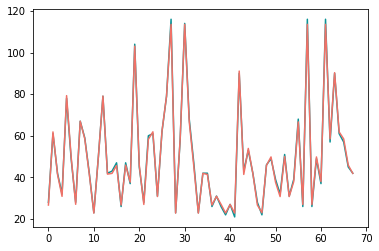

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_rf1,color="#f07167")
plt.show()

In [ ]:
MSE_rf = list()
for i in range(3,10):
  rf_reg = RandomForestRegressor(max_depth = i,random_state=0)
  rf_reg = rf_reg.fit(x_train,y_train)
  y_pred_rf = rf_reg.predict(x_test)
  MSE_rf.append(MSE(y_pred_rf,y_test))

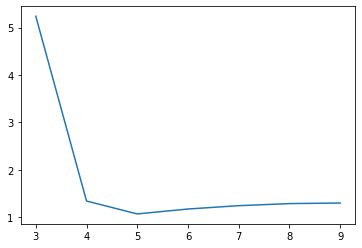

In [ ]:
plt.plot(range(3,10),MSE_rf)
plt.show()

In [ ]:
# INCREASING DEPTH INCREASES MSE 
# GOOD TO HAVE LOWER DEPTH

In [ ]:
MSE_list["random forest"] = min(MSE_rf)

Neural network regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
x=ss.fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
2/2 [==============================] - 1s 163ms/step - loss: 12.4540 - mean_squared_logarithmic_error: 12.3789 - val_loss: 4.7839 - val_mean_squared_logarithmic_error: 4.7839
Epoch 2/10
2/2 [==============================] - 0s 23ms/step - loss: 2.8535 - mean_squared_logarithmic_error: 2.8183 - val_loss: 0.3530 - val_mean_squared_logarithmic_error: 0.3530
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 0.2646 - mean_squared_logarithmic_error: 0.2643 - val_loss: 0.5365 - val_mean_squared_logarithmic_error: 0.5365
Epoch 4/10
2/2 [==============================] - 0s 22ms/step - loss: 0.9148 - mean_squared_logarithmic_error: 0.9210 - val_loss: 1.3133 - val_mean_squared_logarithmic_error: 1.3133
Epoch 5/10
2/2 [==============================] - 0s 26ms/step - loss: 1.6509 - mean_squared_logarithmic_error: 1.6550 - val_loss: 1.5929 - val_mean_squared_logarithmic_error: 1.5929
Epoch 6/10
2/2 [==============================] - 0s 21ms/step - loss: 1.8203 - me

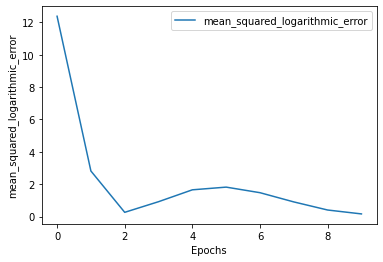

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  #plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(x_train, y_train)
y_pred_nn=reg.predict(x_test)
print("MSE for Neural Network Regressor: ",MSE(y_pred_nn, y_test))

MSE for Neural Network Regressor:  0.8796303817055585


In [ ]:
MSE_list["neural network"] = MSE(y_pred_nn,y_test)

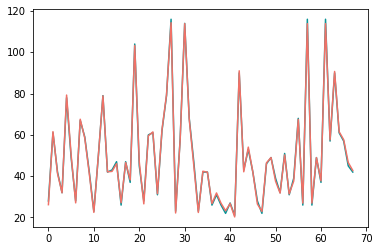

In [ ]:
plt.plot(y_test,color="#0a9396")
plt.plot(y_pred_nn,color="#f07167")
plt.show()

In [ ]:
mse = pd.DataFrame({"Models" : MSE_list.keys() , "MSE" : MSE_list.values()})
mse

,Models,MSE
0,ridge regression,35.527892
1,KNN,44.247647
2,decision tree,1.092183
3,random forest,1.070932
4,neural network,0.879630
